In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('dataset.csv')
data_visual =pd.read_csv('dataset.csv')

In [4]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [12]:
# Adding additioal columns to dataframe as per need

def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index'] == 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obisity'
data_visual['Status'] = data_visual.apply(convert_status_to_description, axis=1)
data_visual.head()
    

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [14]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] =='Female':
        return 0
    
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label, axis=1)
data_visual.head()
    
        

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


In [16]:
# Scatter plot showing different categories for all points in data

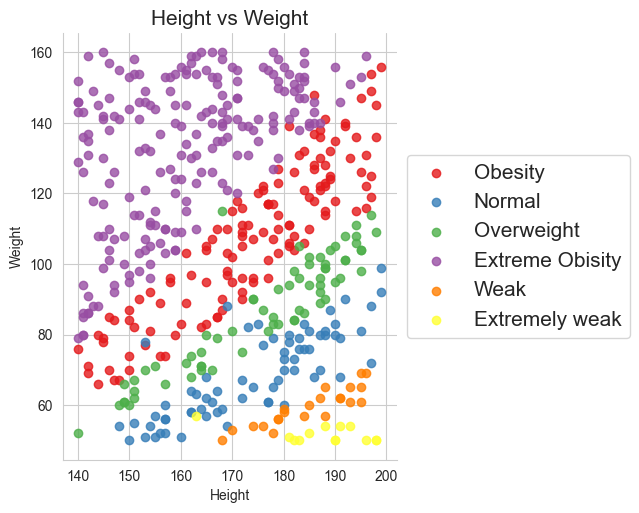

In [23]:
sns.set_style('whitegrid')

sns.lmplot(x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

# sns.lmplot(x='Height', y='Weight', data=data_visual,
#            fit_reg=False,
#            hue='Status',
#            legend=False,
#            palette='Set1',
#            size=8,
#            aspect=1)

# ax1 = plt.gca()
# ax1.set_title('Height vs Weight', size=15)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

In [ ]:
sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)


# Machine learning

In [24]:
# import liraries and encoding categorical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [26]:
df = pd.DataFrame(data)

df['Gender'] = le.fit_transform(df['Gender'])
df.sample(10)

,Gender,Height,Weight,Index
405,1,148,141,5
309,1,171,141,5
464,0,181,80,2
266,1,173,139,5
133,0,167,110,4
378,0,154,96,5
463,0,145,141,5
488,1,198,136,4
35,0,189,132,4
49,1,140,152,5


In [ ]:

# Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])

In [28]:
df.head()

,Gender,Height,Weight,Index
0,1.020204,0.247939,-0.309117,4
1,1.020204,1.164872,-0.587322,2
2,-0.980196,0.920357,0.123647,4
3,-0.980196,1.531645,-0.061823,3
4,1.020204,-1.280283,-1.391027,3


# Splitting data into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Index'])
Y = df['Index']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# Ensemble Learning (Random Forest Classification)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 2000, criterion='entropy', random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2000, random_state=0)

In [35]:
y_pred_rfc = model.predict(X_test)

In [36]:
# accuracy measurements
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0],
       [ 0,  3, 16,  2,  2,  0],
       [ 0,  0,  1, 15,  1,  0],
       [ 0,  0,  0,  0, 29,  2],
       [ 0,  0,  0,  0,  4, 44]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

88.0

In [39]:
#Calculation of optimal number of trees in Random Forest

In [41]:
def trees_in_forest_vs_acc(trees, X_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [43]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.88, 0.88, 0.896, 0.896, 0.888, 0.888]

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.880
1,200,0.880
2,300,0.896
3,500,0.896
4,700,0.888


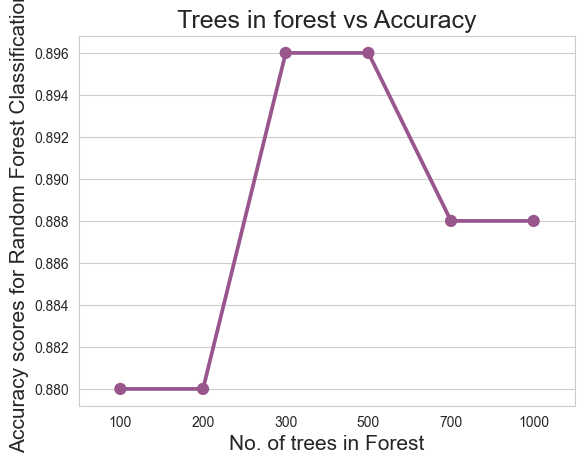

In [44]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()


# Code snippet for testing other person's Health Status based on the above model

In [47]:
def predict_mpg(config, model):
    if type(config)==dict:
        df = pd.DataFrame(config)
    else:
        df = config
        
    y_pred = model.predict(df)
    
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'
    
    return y_pred   

In [49]:
config ={
    'Gender': [1],
    'Height': [49],
    'Weight': [49]
}

predict_mpg(config, model)

'Obesity'

In [50]:
# Create model file
import pickle

pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)
    
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
score = pickle_model.score(X_test, y_test)   
print("Test score: {0:.22f}".format(100 * score))
Ypredict = pickle_model.predict(X_test)
 
      

Test score: 88.0000000000000000000000


In [51]:
## loading model

pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)


predictValue = predict_mpg(config, model)
predictValue    

'Obesity'